# Excel Automation

The main use case of xlwings is to build interactive applications where Excel spread‐ sheets act as the user interface, allowing you to call Python by clicking a button or calling a user-defined function.

## Getting Started with xlwings 

### Using Excel as Data Viewer 

In [1]:
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

In [2]:
# Let's create a DataFrame based on pseudorandom numbers and 
# with enough rows that only the head and tail are shown
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,0.645586,-0.256180,0.495538,2.014211,0.379844
1,0.443941,1.371244,-0.832808,1.474660,-0.851874
2,0.926655,-0.041778,-0.695368,-2.003541,-0.305777
3,-0.957013,0.499331,-0.150279,0.913638,-1.886473
4,-1.309268,-0.591830,-0.185626,-1.277220,-0.155505
...,...,...,...,...,...
95,-0.917445,-0.882197,-0.042495,0.145563,0.897900
96,-1.227374,0.636106,-0.115613,0.840839,0.201259
97,-0.825779,0.786136,0.189731,-0.584834,0.379202
98,0.652121,-0.137036,-2.246707,-1.087663,0.097962


In [3]:
# View the DataFrame in Excel
xw.view(df)

### The Excel Object Model 

When you work with Excel programmatically, you interact with its components like a workbook or a sheet. These components are organized in the Excel object model, a hierarchical structure that represents Excel’s graphical user interface. 

xlwings uses the names **app** instead of application and **book** instead of workbook:
+ An app contains the books collection
+ A book contains the sheets collection
+ A sheet gives access to range objects and collections such as charts
+ A range contains one or more contiguous cells as its items

To summarize, an Excel instance is a sandboxed environment, which means that one instance can’t communicate with the other one.

In [4]:
# Create a new empty workbook and print its name.
book = xw.Book()
book.name

'Book3'

In [5]:
# Accessing the sheets collection
book.sheets

Sheets([<Sheet [Book3]Sheet1>])

In [6]:
# Get a sheet object by index or name. You will need to adjust 
# "Sheet1" if your sheet is called differently.
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]

In [7]:
sheet1.range("A1")

<Range [Book3]Sheet1!$A$1>

In [8]:
# Most common tasks: write values... 
sheet1.range("A1").value = [[1, 2], [3, 4]] 
sheet1.range("A4").value = "Hello!"

In [9]:
# ...and read values 
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [10]:
sheet1.range("A4").value

'Hello!'

In [11]:
# Indexing 
sheet1.range("A1:B2")[0, 0]

<Range [Book3]Sheet1!$A$1>

In [12]:
# Slicing 
sheet1.range("A1:B2")[:, 1]

<Range [Book3]Sheet1!$B$1:$B$2>

In [13]:
# Single cell: A1 notation 
sheet1["A1"]

<Range [Book3]Sheet1!$A$1>

In [14]:
# Multiple cells: A1 notation 
sheet1["A1:B2"]

<Range [Book3]Sheet1!$A$1:$B$2>

In [15]:
# Single cell: indexing 
sheet1[0, 0]

<Range [Book3]Sheet1!$A$1>

In [16]:
# Multiple cells: slicing 
sheet1[:2, :2]

<Range [Book3]Sheet1!$A$1:$B$2>

In [17]:
# D10 via sheet indexing 
sheet1[9, 3]

<Range [Book3]Sheet1!$D$10>

In [18]:
# D10 via range object 
sheet1.range((10, 4))

<Range [Book3]Sheet1!$D$10>

In [19]:
# D10:F11 via sheet slicing 
sheet1[9:11, 3:6]

<Range [Book3]Sheet1!$D$10:$F$11>

In [20]:
# D10:F11 via range object 
sheet1.range((10, 4), (11, 6))

<Range [Book3]Sheet1!$D$10:$F$11>

In [21]:
# Get from a range object up to the app object
sheet1["A1"].sheet.book.app

<Excel App 8086>

In [22]:
# Get one app object from the open workbook
# and create an additional invisible app instance 
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [23]:
# List the book names that are open in each instance 
# by using a list comprehension
[book.name for book in visible_app.books]

['Book3']

In [25]:
[book.name for book in invisible_app.books]

['Book1']

In [26]:
# An app key represents the process ID (PID) 
xw.apps.keys()

[8142, 8086]

In [27]:
# It can also be accessed via the pid attribute 
xw.apps.active.pid

8142

In [28]:
invisible_app.books

Books([<Book [Book1]>])

In [29]:
# Work with the book in the invisible Excel instance
invisible_book = invisible_app.books[0] 
invisible_book.sheets[0]["A1"].value = "Created by an invisible app."

In [31]:
# Save the Excel workbook in the directory 
invisible_book.save("invisible.xlsx")

In [32]:
# Quit the invisible Excel instance 
invisible_app.quit()

### Running VBA Code 

In [33]:
vba_book = xw.Book("vba.xlsm")

In [34]:
# Instantiate a macro object with the VBA function 
mysum = vba_book.macro("Module1.MySum")
# Call a VBA function
mysum(5, 4)

9.0

In [35]:
# It works the same with a VBA Sub procedure 
show_msgbox = vba_book.macro("Module1.ShowMsgBox") 
show_msgbox("Hello xlwings!")

''

In [36]:
# Close the book again (make sure to close the MessageBox first) 
vba_book.close()

## Converters, Options, and Collections 

### Working with DataFrames 

In [37]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
       ["John", 33, "USA", 6.7, "America"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000])
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [38]:
sheet1["A6"].value = df

In [39]:
sheet1["B10"].options(header=False, index=False).value = df

In [40]:
df2 = sheet1["A6"].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


In [41]:
# If you want the index to be an integer index, 
# you can change its data type
df2.index = df2.index.astype(int)
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


In [42]:
# By setting index=False, it will put all the values from Excel into 
# the data part of the DataFrame and will use the default index
sheet1["A6"].expand().options(pd.DataFrame, index=False).value

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,America


### Converters and Options 

In [43]:
# Horizontal range (one-dimensional) 
sheet1["A1:B1"].value

[1.0, 2.0]

In [44]:
# Vertical range (one-dimensional) 
sheet1["A1:A2"].value

[1.0, 3.0]

In [45]:
# Horizontal range (two-dimensional) 
sheet1["A1:B1"].options(ndim=2).value

[[1.0, 2.0]]

In [46]:
# Vertical range (two-dimensional) 
sheet1["A1:A2"].options(ndim=2).value

[[1.0], [3.0]]

In [47]:
# Using the NumPy array converter behaves the same: 
# vertical range leads to a one-dimensional array 
sheet1["A1:A2"].options(np.array).value

array([1., 3.])

In [48]:
# Preserving the column orientation 
sheet1["A1:A2"].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [49]:
# If you need to write out a list vertically,
# the "transpose" option comes in handy 
sheet1["D1"].options(transpose=True).value = [100, 200]

In [50]:
# Write out some sample data
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [51]:
# Read it back using the default options 
sheet1["A13:C13"].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [52]:
# Read it back using non-default options 
sheet1["A13:C13"].options(empty="NA",
                          dates=dt.date,
                          numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

### Charts, Pictures, and Defined Names 

#### Exel Charts 

In [53]:
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]

In [54]:
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

#### Pictures: Matplotlib plots

In [55]:
# Read in the chart data as DataFrame
df = sheet1["A15"].expand().options(pd.DataFrame).value 
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [56]:
df.index

Index(['Last Year', 'This Year'], dtype='object')

In [57]:
# Enable Matplotlib by using the notebook magic command 
# and switch to the "seaborn" style
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

/var/folders/sk/l79fh3f57gb_4xq3w3r4vvbm0000gn/T/ipykernel_8112/1939635510.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


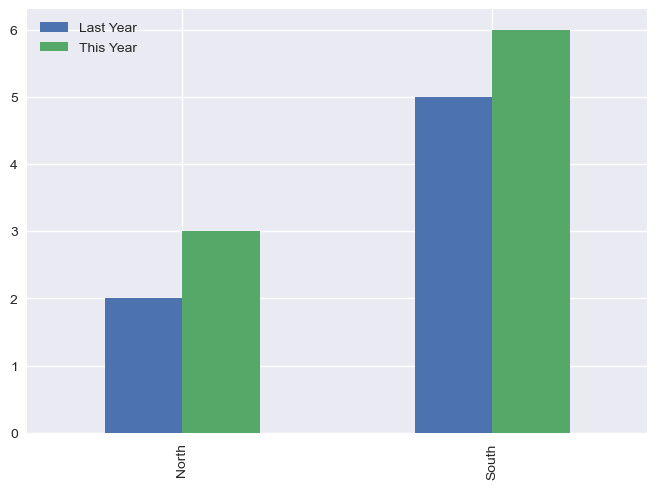

In [58]:
# The pandas plot method returns an "axis" object from
# where you can get the figure. "T" transposes the
# DataFrame to bring the plot into the desired orientation
ax = df.T.plot.bar()
fig = ax.get_figure()

In [59]:
# Send the plot to Excel
plot = sheet1.pictures.add(fig, name="SalesPlot",
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
# Let's scale the plot to 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [60]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

#### Defined names

In [61]:
# The book scope is the default scope 
sheet1["A1:B2"].name = "matrix1"

In [62]:
# For the sheet scope, prepend the sheet name with 
# an exclamation point
sheet1["B10:E11"].name = "Sheet1!matrix2"

In [63]:
# Now you can access the range by name
sheet1["matrix1"]

<Range [Book3]Sheet1!$A$1:$B$2>

In [64]:
# If you access the names collection via the "sheet1" object, 
# it contains only names with that sheet's scope 
sheet1.names

[<Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [65]:
# If you access the names collection via the "book" object, 
# it contains all names, including book and sheet scope 
book.names

[<Name 'matrix1': =Sheet1!$A$1:$B$2>, <Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [66]:
# Names have various methods and attributes.
# You can, for example, get the respective range object. 
book.names["matrix1"].refers_to_range

<Range [Book3]Sheet1!$A$1:$B$2>

In [67]:
# If you want to assign a name to a constant 
# or a formula, use the "add" method
book.names.add("EURUSD", "=1.1151")

<Name 'EURUSD': =1.1151>

## Advanced xlwings Topics 

### Improving Performance 

#### Minimize cross-application calls 

In [68]:
# Add a new sheet and write 150 values
# to it to have something to work with
sheet2 = book.sheets.add()
sheet2["A1"].value = np.arange(150).reshape(30, 5)

In [69]:
%%time
# This makes 150 cross-application calls 
for cell in sheet2["A1:E30"]:
    cell.value += 1

CPU times: user 363 ms, sys: 177 ms, total: 540 ms
Wall time: 4.31 s


In [70]:
%%time
# This makes just two cross-application calls 
values = sheet2["A1:E30"].options(np.array).value 
sheet2["A1"].value = values + 1

CPU times: user 27.6 ms, sys: 15.7 ms, total: 43.3 ms
Wall time: 64.9 ms


#### Raw values 

Using raw values, however, means that you cannot directly work with DataFrames anymore. Instead, you need to provide your values as nested lists or tuples. Also, you will need to provide the full address of the range you are writing to—providing the top-left cell isn’t enough anymore:

In [71]:
# With raw values, you must provide the full
# target range, sheet["A35"] doesn't work anymore 
sheet1["A35:B36"].options("raw").value = [[1, 2], [3, 4]]

#### App properties

Depending on the content of your workbook, changing the properties of your app objects can also help to make code run faster. Usually, you want to look at the follow‐ ing properties (myapp is an xlwings app object):
+ myapp.screen_updating = False
+ myapp.calculation = "manual"
+ myapp.display_alerts = False

At the end of the script, make sure to set the attributes back to their original state. If you are on Windows, you may also see a slight performance improvement by running your script in a hidden Excel instance via **xw.App(visible=False)**.

### How to Work Around Missing Functionality 

xlwings gives you access to the underlying pywin32 object on Windows and the appscript object on macOS by using the api attribute on any xlwings object. This way, you have access to the whole Excel object model, but in turn, you lose cross-platform compatibility. 

In [ ]:
import sys
if sys.platform.startswith("darwin"):
    sheet["A10"].api.clear_formats() 
elif sys.platform.startswith("win"):
    sheet["A10"].api.ClearFormats()